# HDB resales price ANALYSIS CA1 REPORT PART C 

# Importing the relevant libraries for analysis, cleaning and visualisation



In [1]:
#data cleaning and manipulation
import numpy as np 
import pandas as pd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Scikit learn 
# Encode all non numeric column
from sklearn.preprocessing import LabelEncoder


# Load the train data

In [2]:
HDB_df = pd.read_csv('data/ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv')
HDB_df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


# identify data shape, columns name, types and data details for train dataset
## the columns can be identified by the types, the relevant shapes of data set (167169 ,10)

In [3]:
HDB_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167169 entries, 0 to 167168
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                167169 non-null  object 
 1   town                 167169 non-null  object 
 2   flat_type            167169 non-null  object 
 3   block                167169 non-null  object 
 4   street_name          167169 non-null  object 
 5   storey_range         167169 non-null  object 
 6   floor_area_sqm       167169 non-null  float64
 7   flat_model           167169 non-null  object 
 8   lease_commence_date  167169 non-null  int64  
 9   remaining_lease      167169 non-null  object 
 10  resale_price         167169 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 14.0+ MB


In [21]:
HDB_df.describe()

,month,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
count,167169.000000,167169.000000,167169.000000,167169.000000,167169.000000,167169.000000,167169.000000,1.671690e+05
mean,43.584947,3.131394,2.255466,97.316648,8.652597,1995.833839,391.181708,4.899241e+05
std,23.465826,0.918816,1.982552,24.022974,3.631894,13.924826,166.712371,1.694773e+05
min,0.000000,0.000000,0.000000,31.000000,0.000000,1966.000000,0.000000,1.400000e+05
25%,23.000000,2.000000,1.000000,82.000000,5.000000,1985.000000,255.000000,3.650000e+05
50%,46.000000,3.000000,2.000000,93.000000,8.000000,1996.000000,391.000000,4.600000e+05
75%,63.000000,4.000000,3.000000,112.000000,12.000000,2009.000000,550.000000,5.800000e+05
max,82.000000,6.000000,16.000000,249.000000,20.000000,2022.000000,668.000000,1.500000e+06


# DATA CLEANING AND CLEANING OF MISSING DATA

## DATASET MISSING
### for the train dataset, there's quite a substantial number of missing data in Age and Cabin, with only 2 entries missing for Embarked

In [4]:
# Count for missing values for train data
missing_no_hdb = HDB_df.isnull()
missing_no_hdb = missing_no_hdb.sum()
missing_no_hdb

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

## Encoder to process data

In [5]:
#Encoding categorical features to numerical to process data to feed model
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
HDB_df['town'] = le.fit_transform(HDB_df['town'])
HDB_df['flat_type'] = le.fit_transform(HDB_df['flat_type'])
HDB_df['block'] = le.fit_transform(HDB_df['block'])
HDB_df['street_name'] = le.fit_transform(HDB_df['street_name'])
HDB_df['storey_range'] = le.fit_transform(HDB_df['storey_range'])
HDB_df['flat_model'] = le.fit_transform(HDB_df['flat_model'])
HDB_df['remaining_lease'] = le.fit_transform(HDB_df['remaining_lease'])
HDB_df['month'] = le.fit_transform(HDB_df['month'])
HDB_df



,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,0,0,1,1119,13,3,44.0,5,1979,230,232000.0
1,0,0,2,37,16,0,67.0,12,1978,221,250000.0
2,0,0,2,1726,17,0,67.0,12,1980,243,262000.0
3,0,0,2,1314,13,1,68.0,12,1980,239,265000.0
4,0,0,2,1721,17,0,67.0,12,1980,243,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
167164,76,25,5,2355,558,0,154.0,7,1987,256,829000.0
167165,76,25,5,2352,558,2,146.0,7,1987,256,855000.0
167166,78,25,5,2370,558,0,146.0,7,1988,257,860000.0
167167,72,25,6,1940,539,2,179.0,11,1987,261,1080000.0


# ANALYSIS AND DATA EXPLORATION

## exploring other variables to find a patterns

### key findings

-(Town) x remove: Very low correlations to town located

-(block) x remove: Very low correlations to block number

-(street_name)x remove: Very low correlations to street name

-decent correlations to month, flat type, storey range, floor area, lease commencement date, remaining lease

<Axes: >

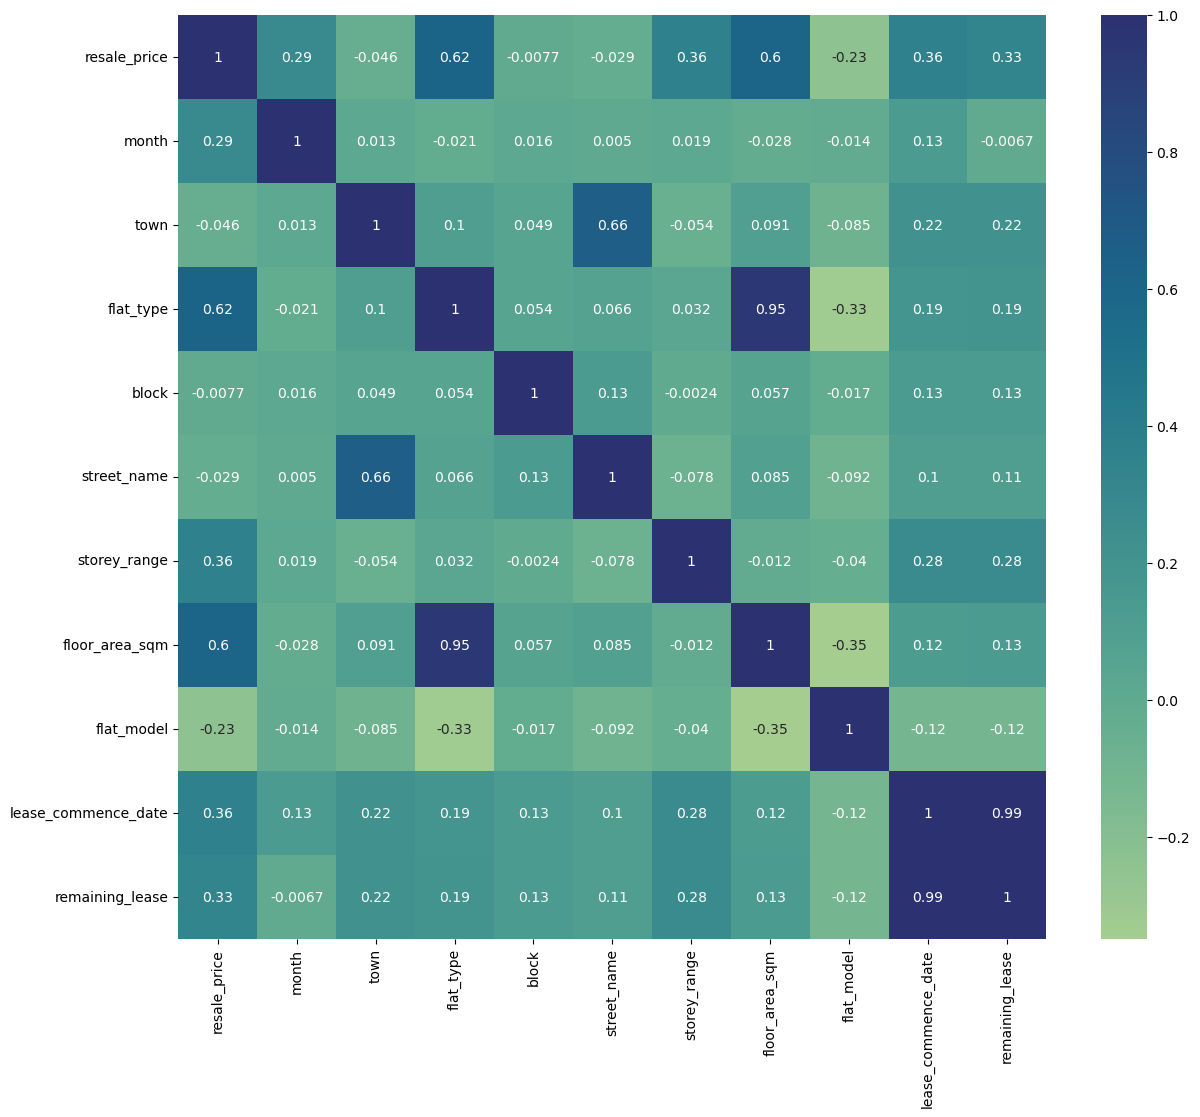

In [6]:
plt.figure(figsize=(14,12))
sns.heatmap(HDB_df[['resale_price','month', 'town','flat_type', 'block',	'street_name',	'storey_range', 
                'floor_area_sqm', 'flat_model', 'lease_commence_date', 'remaining_lease']].corr(), annot=True,cmap="crest")

# FEATURE SELECTION
## Dropping columns that are not necessary for building model

In [7]:
HDB_df = HDB_df.drop(columns=['town', 'block','street_name'])

# Modeling and Evaluation

In [8]:
## Splitting data by train and test

In [9]:
# splitting data 
from sklearn.model_selection import train_test_split
X = HDB_df.drop(columns=['resale_price'])
y = HDB_df['resale_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Classifying by Random Forest regression

In [10]:
# import the class
from sklearn.ensemble import RandomForestRegressor

# instantiate the model (using the default parameters)
rfg_model = RandomForestRegressor()
rfg_model.fit(X_train, y_train)


print(rfg_model.score(X_test, y_test)*100,"%")


81.01105273813577 %


## hyperparameters tuning

In [15]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [5,20,50,100]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)]
min_samples_split = [2, 6, 10]
min_samples_leaf = [1, 3, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
'max_features': max_features,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf,
'bootstrap': bootstrap}
rf_random = RandomizedSearchCV(estimator = rfg_model,param_distributions = random_grid,
               n_iter = 30, cv = 3, verbose=2, random_state=30, n_jobs = -1)

In [16]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=30, verbose=2)

## Best Parameters to adjust to

In [17]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': False}  



In [19]:
randmf = RandomForestRegressor(n_estimators = 50, min_samples_split = 2, min_samples_leaf= 3, max_features = 'sqrt', max_depth= 100, bootstrap=False) 
randmf.fit( X_train, y_train) 

RandomForestRegressor(bootstrap=False, max_depth=100, max_features='sqrt',
                      min_samples_leaf=3, n_estimators=50)

### Return the coefficient of determination score of the prediction.

In [20]:
print("Score of model =", randmf.score(X_train, y_train)*100, "%")

Score of model = 92.03716986079911 %


In [39]:
from sklearn.metrics import mean_squared_error
y_pred = randmf.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

72899.11525452678

In [22]:
y_pred = randmf.predict(X_test)

C:\Users\chew_\anaconda3\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


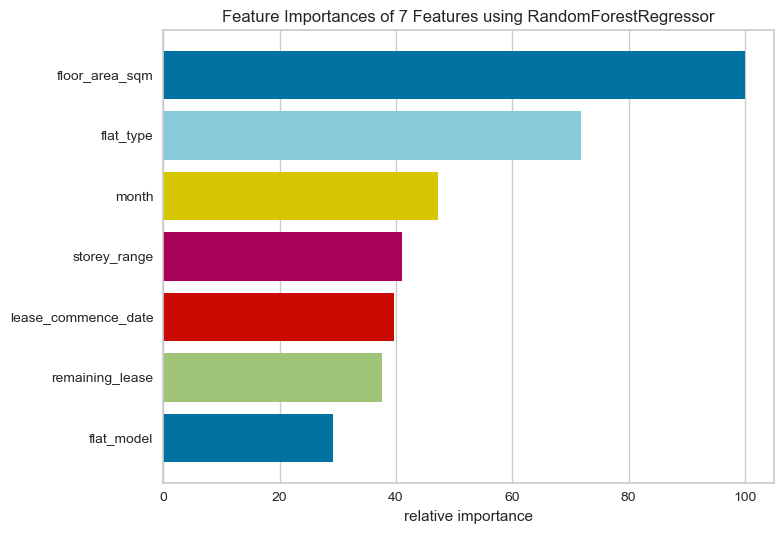

<Axes: title={'center': 'Feature Importances of 7 Features using RandomForestRegressor'}, xlabel='relative importance'>

In [38]:
from yellowbrick.model_selection import FeatureImportances


viz = FeatureImportances(randmf)
viz.fit(X, y)
viz.show()